# Sentiment Analysisof Tweets

### Importing libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import nltk 
from nltk.corpus import stopwords
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [6]:
# Load the data 
# data source: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

tweets_df = pd.read_csv('twitter.csv')

In [7]:
tweets_df.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
tweets_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [10]:
# Drop the 'id' column from the DataFrame.
tweets_df = tweets_df.drop(['id'], axis=1)

### Explolatory Data Analysis

In [19]:
tweets_df.isnull().sum()

label    0
tweet    0
dtype: int64

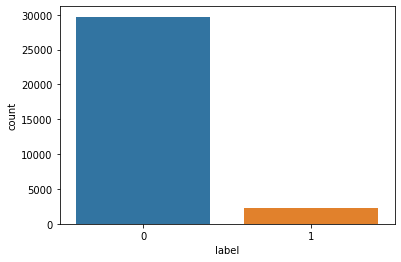

In [24]:
sns.countplot(data=tweets_df,x='label', label = "Count"); 

In [26]:
# Get length of tweets
tweets_df['length'] = tweets_df['tweet'].apply(len)

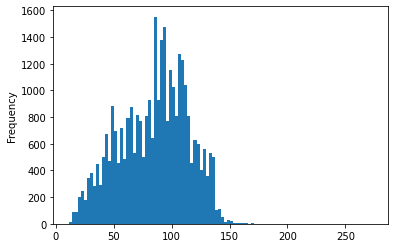

In [28]:
tweets_df['length'].plot(bins=100, kind='hist'); 

In [31]:
positive = tweets_df[tweets_df['label']==0]

In [32]:
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [33]:
negative = tweets_df[tweets_df['label']==1]

In [34]:
negative

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

In [37]:
# Preparing to to plot worcloud

sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [36]:
sentences_as_one_string =" ".join(sentences)

In [38]:
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

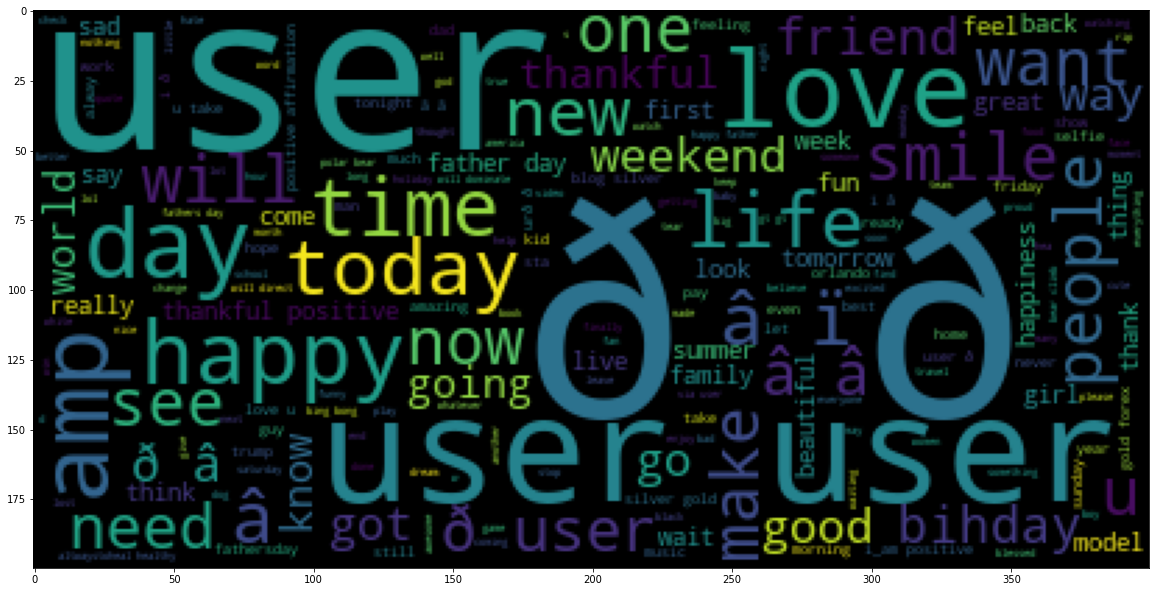

In [46]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string));

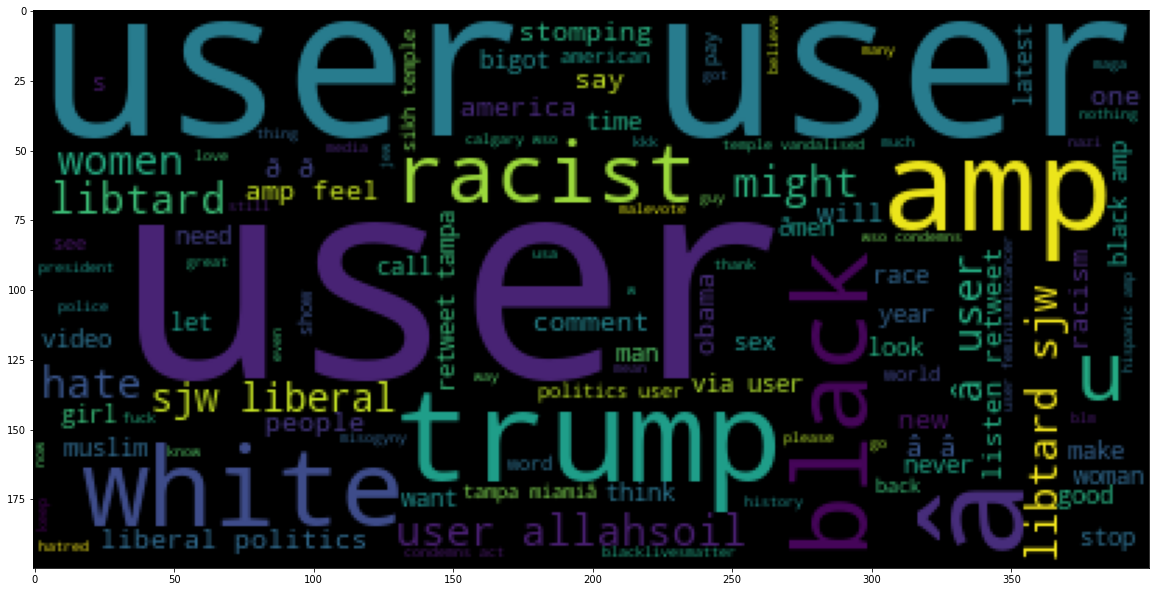

In [44]:
negative_sentences_as_one_string = " ".join(negative["tweet"].tolist())
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string));

### Data Cleaning and Preprocessing

In [48]:
# Pipeline to clean up all tweets 
# The pipeline performs the following: remove punctuation, remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [49]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [50]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [51]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [53]:
# Analyzer is a preprocessing step fortheinput message 
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [54]:
print(vectorizer.get_feature_names())

['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '045', '04k', '05', '0506823156', '06', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscouple', '0618â\x99¡', '0620', '06202016', '0622', '0624', '06Â', '07', '07000', '07040', '07044', '07150', '07190', '07400', '07468', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07930', '07950', '08', '0806', '080616', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '0k', '0shares', '0tolerancemovie', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', '10', '100', '1000', '100000', '10003', '10007', '1000gifts', '1000th', '1000x', '1000yr', '1000â\x82¬', '1001', '1001000s', '10014', '10021', '10025', '10040', '100616', '10064', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100f

In [55]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
tweets_countvectorizer.shape

(31962, 47386)

In [58]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [60]:
y = tweets_df['label']

MINI CHALLENGE #8

### Buildig and Training the Model

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

### Assessing model Performance

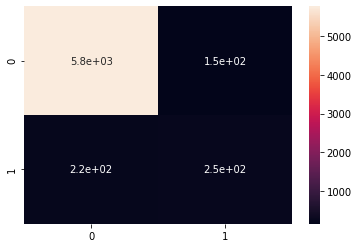

In [64]:
# Predicting the Test set results

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True);

In [65]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5919
           1       0.62      0.53      0.57       474

    accuracy                           0.94      6393
   macro avg       0.79      0.75      0.77      6393
weighted avg       0.94      0.94      0.94      6393



### Future improvements

1) Try out different models and also perform hyperparamter tuning.<br>
2) Try adding additional Feturesto combat data imbalance